In [1]:
import pandas as pd
import numpy as np
import warnings
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
filepath = '../data/국내고층/'
csvname = os.listdir(filepath)

In [3]:
df = pd.DataFrame()
for csv in csvname:
    print(csv)
    df = pd.concat([df,pd.read_csv(filepath+csv,encoding='cp949')])
df

OBS_SONDE_F00508_20220308230329.csv
OBS_SONDE_F00508_20220308230347.csv
OBS_SONDE_F00508_20220308230406.csv
OBS_SONDE_F00508_20220308230448.csv
OBS_SONDE_F00508_20220308230539.csv
OBS_SONDE_F00508_20220308230605.csv
OBS_SONDE_F00508_20220308230635.csv
OBS_SONDE_F00508_20220308230712.csv
OBS_SONDE_F00508_20220308231004.csv
OBS_SONDE_F00508_20220308231030.csv
OBS_SONDE_F00508_20220308231055.csv
OBS_SONDE_F00508_20220308231118.csv
OBS_SONDE_F00508_20220308231222.csv
OBS_SONDE_F00508_20220308231245.csv
OBS_SONDE_F00508_20220308231305.csv
OBS_SONDE_F00508_20220308231715.csv
OBS_SONDE_F00508_20220308231759.csv
OBS_SONDE_F00508_20220308231859.csv
OBS_SONDE_F00508_20220308232025.csv
OBS_SONDE_F00508_20220308232122.csv
UPPER_SONDE_47122_STD_2010_2010_2018.csv
UPPER_SONDE_47122_STD_2011_2011_2018.csv
UPPER_SONDE_47122_STD_2012_2012_2018.csv
UPPER_SONDE_47122_STD_2013_2013_2018.csv
UPPER_SONDE_47122_STD_2014_2014_2015.csv
UPPER_SONDE_47122_STD_2015_2015_2018.csv
UPPER_SONDE_47122_STD_2016_2016_20

,지점,지점명,일시(UTC),기압(hPa),고도(gpm),기온(°C),이슬점온도(°C),풍향(deg),풍속(knot)
0,47122,오산,1990-01-01 00:00,30,23620.0,-51.9,NaN,260.0,23.0
1,47122,오산,1990-01-01 00:00,50,20340.0,-53.3,NaN,270.0,30.0
2,47122,오산,1990-01-01 00:00,70,18190.0,-52.1,NaN,275.0,44.0
3,47122,오산,1990-01-01 00:00,100,NaN,-56.9,NaN,NaN,NaN
4,47122,오산,1990-01-01 00:00,150,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18844,47122,NaN,2021-12-31 18:00,500,5520.0,-26.9,-50.9,295.0,62.0
18845,47122,NaN,2021-12-31 18:00,700,3023.0,-11.7,-30.7,320.0,31.0
18846,47122,NaN,2021-12-31 18:00,850,1521.0,-7.9,-37.9,330.0,23.0
18847,47122,NaN,2021-12-31 18:00,925,864.0,-10.5,-25.5,340.0,17.0


In [4]:
df['기압(hPa)'].value_counts()

850     45317
1000    45316
925     45314
700     45310
500     45292
400     45207
300     45079
250     44982
200     44833
150     44615
100     44158
70      40789
50      38635
30      34864
20      31322
10      21409
Name: 기압(hPa), dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662399 entries, 0 to 18848
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   지점         662399 non-null  int64  
 1   지점명        425148 non-null  object 
 2   일시(UTC)    662399 non-null  object 
 3   기압(hPa)    662399 non-null  int64  
 4   고도(gpm)    654095 non-null  float64
 5   기온(°C)     650838 non-null  float64
 6   이슬점온도(°C)  626765 non-null  float64
 7   풍향(deg)    635430 non-null  float64
 8   풍속(knot)   635435 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 50.5+ MB


In [7]:
# df['일시'] = df['일시(UTC)'].astype()
df.drop(['지점','지점명'],axis=1,inplace=True)

In [8]:
df = df.rename({'일시(UTC)':'일시'},axis=1)

In [9]:
tdf = pd.DataFrame({'일시':df['일시'].unique()})
tdf

,일시
0,1990-01-01 00:00
1,1990-01-01 06:00
2,1990-01-01 12:00
3,1990-01-01 18:00
4,1990-01-02 00:00
...,...
45358,2021-12-30 18:00
45359,2021-12-31 00:00
45360,2021-12-31 06:00
45361,2021-12-31 12:00


In [10]:
list(df['기압(hPa)'].unique())

[30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 850, 925, 1000, 20, 10]

In [11]:
hpalst = [50, 70, 100, 150, 200, 250, 300, 400, 500, 700, 850, 925, 1000]
for hpa in hpalst:
    tmp = df[df['기압(hPa)']==hpa].drop('기압(hPa)',axis=1)
    tmp.columns = ['일시', f'{hpa}hPa_고도', f'{hpa}hPa_기온', f'{hpa}hPa_이슬점', f'{hpa}hPa_풍향', f'{hpa}hPa_풍속']
    tdf = pd.merge(tdf,tmp, how='left',on='일시')
tdf

,일시,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
0,1990-01-01 00:00,20340.0,-53.3,NaN,270.0,30.0,18190.0,-52.1,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,178.0,-4.5,-9.5,50.0,9.0
1,1990-01-01 06:00,20340.0,-55.3,NaN,240.0,30.0,18190.0,-56.1,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,175.0,-0.7,-6.7,335.0,2.0
2,1990-01-01 12:00,20300.0,-56.9,NaN,250.0,32.0,18150.0,-51.9,NaN,160.0,...,NaN,NaN,NaN,NaN,NaN,189.0,-2.1,-9.1,280.0,8.0
3,1990-01-01 18:00,20350.0,-55.9,NaN,255.0,26.0,18200.0,-54.7,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,192.0,-3.7,-12.7,355.0,6.0
4,1990-01-02 00:00,20320.0,-57.9,NaN,270.0,30.0,18180.0,-52.9,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,188.0,-4.1,-12.1,335.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45358,2021-12-30 18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,836.0,-11.9,-22.9,315.0,32.0,233.0,-6.3,-20.3,320.0,22.0
45359,2021-12-31 00:00,20500.0,-57.5,-88.5,315.0,21.0,18370.0,-58.5,-89.5,270.0,...,850.0,-13.9,-24.9,305.0,25.0,252.0,-8.7,-21.7,310.0,12.0
45360,2021-12-31 06:00,20460.0,-59.5,-89.5,275.0,30.0,18340.0,-60.3,-90.3,270.0,...,854.0,-12.7,-21.7,305.0,15.0,253.0,-6.9,-20.9,280.0,15.0
45361,2021-12-31 12:00,20470.0,-57.9,-88.9,245.0,23.0,18350.0,-59.7,-89.7,260.0,...,858.0,-11.9,-22.9,315.0,20.0,256.0,-6.9,-19.9,330.0,10.0


In [12]:
# tdf = tdf.fillna(tdf.mean().round(1))
# plt.figure(figsize=(15,3))
# sns.lineplot(x=range(500),y=tdf.loc[10500:10999,'30hPa_이슬점'])

In [13]:
tdf

,일시,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
0,1990-01-01 00:00,20340.0,-53.3,NaN,270.0,30.0,18190.0,-52.1,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,178.0,-4.5,-9.5,50.0,9.0
1,1990-01-01 06:00,20340.0,-55.3,NaN,240.0,30.0,18190.0,-56.1,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,175.0,-0.7,-6.7,335.0,2.0
2,1990-01-01 12:00,20300.0,-56.9,NaN,250.0,32.0,18150.0,-51.9,NaN,160.0,...,NaN,NaN,NaN,NaN,NaN,189.0,-2.1,-9.1,280.0,8.0
3,1990-01-01 18:00,20350.0,-55.9,NaN,255.0,26.0,18200.0,-54.7,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,192.0,-3.7,-12.7,355.0,6.0
4,1990-01-02 00:00,20320.0,-57.9,NaN,270.0,30.0,18180.0,-52.9,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,188.0,-4.1,-12.1,335.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45358,2021-12-30 18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,836.0,-11.9,-22.9,315.0,32.0,233.0,-6.3,-20.3,320.0,22.0
45359,2021-12-31 00:00,20500.0,-57.5,-88.5,315.0,21.0,18370.0,-58.5,-89.5,270.0,...,850.0,-13.9,-24.9,305.0,25.0,252.0,-8.7,-21.7,310.0,12.0
45360,2021-12-31 06:00,20460.0,-59.5,-89.5,275.0,30.0,18340.0,-60.3,-90.3,270.0,...,854.0,-12.7,-21.7,305.0,15.0,253.0,-6.9,-20.9,280.0,15.0
45361,2021-12-31 12:00,20470.0,-57.9,-88.9,245.0,23.0,18350.0,-59.7,-89.7,260.0,...,858.0,-11.9,-22.9,315.0,20.0,256.0,-6.9,-19.9,330.0,10.0


In [14]:
tdf['일시'] = tdf['일시'].apply(lambda x:x.split()[0])
tdf.groupby('일시').mean()

,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,70hPa_풍속,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
일시,,,,,,,,,,,,,,,,,,,,,
1990-01-01,20332.500000,-55.35,NaN,253.750000,29.50,18182.500000,-53.700000,NaN,238.750000,41.000000,...,NaN,NaN,NaN,NaN,NaN,183.50,-2.750,-9.500,255.00,6.25
1990-01-02,20355.000000,-57.20,NaN,275.000000,32.50,18222.500000,-55.100000,NaN,250.000000,39.000000,...,NaN,NaN,NaN,NaN,NaN,194.50,-4.650,-11.525,337.50,6.50
1990-01-03,20370.000000,-55.60,NaN,268.750000,32.50,18237.500000,-58.100000,NaN,275.000000,46.000000,...,NaN,NaN,NaN,NaN,NaN,206.00,-5.600,-13.850,150.00,7.25
1990-01-04,20377.500000,-56.45,NaN,242.500000,24.25,18255.000000,-59.650000,NaN,267.500000,41.250000,...,NaN,NaN,NaN,NaN,NaN,209.75,-2.700,-12.200,228.75,6.50
1990-01-05,20350.000000,-58.50,NaN,248.333333,34.00,18236.666667,-56.966667,NaN,263.333333,50.000000,...,NaN,NaN,NaN,NaN,NaN,177.25,-0.850,-7.325,232.50,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,20457.500000,-58.45,-89.200000,270.000000,37.00,18337.500000,-56.250000,-87.75,266.250000,51.750000,...,852.00,-7.50,-10.850,293.75,26.00,243.75,-6.150,-11.050,220.00,3.50
2021-12-28,20442.500000,-59.35,-89.850000,277.500000,48.25,18325.000000,-57.750000,-88.50,278.750000,58.750000,...,837.00,-3.05,-6.200,257.50,17.00,215.25,-0.850,-4.725,161.25,6.00
2021-12-29,20483.333333,-57.90,-88.900000,240.000000,31.00,18330.000000,-57.900000,-88.90,265.000000,81.333333,...,789.25,-3.45,-6.825,272.50,25.00,167.00,0.825,-4.800,266.25,14.75


In [15]:
import datetime as dt
range(1,10,1)
dat = pd.DataFrame({'일시':np.arange(dt.datetime(1990,1,1),dt.datetime(2022,1,1),dt.timedelta(days=1))})
dat.astype('str')

,일시
0,1990-01-01
1,1990-01-02
2,1990-01-03
3,1990-01-04
4,1990-01-05
...,...
11683,2021-12-27
11684,2021-12-28
11685,2021-12-29
11686,2021-12-30


In [16]:
dat['일시'] = dat['일시'].apply(lambda x : x.strftime('%Y-%m-%d'))

In [17]:
dat = pd.merge(dat,tdf,how='left',on='일시')
dat

,일시,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
0,1990-01-01,20340.0,-53.3,NaN,270.0,30.0,18190.0,-52.1,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,178.0,-4.5,-9.5,50.0,9.0
1,1990-01-01,20340.0,-55.3,NaN,240.0,30.0,18190.0,-56.1,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,175.0,-0.7,-6.7,335.0,2.0
2,1990-01-01,20300.0,-56.9,NaN,250.0,32.0,18150.0,-51.9,NaN,160.0,...,NaN,NaN,NaN,NaN,NaN,189.0,-2.1,-9.1,280.0,8.0
3,1990-01-01,20350.0,-55.9,NaN,255.0,26.0,18200.0,-54.7,NaN,260.0,...,NaN,NaN,NaN,NaN,NaN,192.0,-3.7,-12.7,355.0,6.0
4,1990-01-02,20320.0,-57.9,NaN,270.0,30.0,18180.0,-52.9,NaN,275.0,...,NaN,NaN,NaN,NaN,NaN,188.0,-4.1,-12.1,335.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45360,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,836.0,-11.9,-22.9,315.0,32.0,233.0,-6.3,-20.3,320.0,22.0
45361,2021-12-31,20500.0,-57.5,-88.5,315.0,21.0,18370.0,-58.5,-89.5,270.0,...,850.0,-13.9,-24.9,305.0,25.0,252.0,-8.7,-21.7,310.0,12.0
45362,2021-12-31,20460.0,-59.5,-89.5,275.0,30.0,18340.0,-60.3,-90.3,270.0,...,854.0,-12.7,-21.7,305.0,15.0,253.0,-6.9,-20.9,280.0,15.0
45363,2021-12-31,20470.0,-57.9,-88.9,245.0,23.0,18350.0,-59.7,-89.7,260.0,...,858.0,-11.9,-22.9,315.0,20.0,256.0,-6.9,-19.9,330.0,10.0


In [29]:
radiosonde = dat.groupby('일시').mean()
radiosonde

,50hPa_고도,50hPa_기온,50hPa_이슬점,50hPa_풍향,50hPa_풍속,70hPa_고도,70hPa_기온,70hPa_이슬점,70hPa_풍향,70hPa_풍속,...,925hPa_고도,925hPa_기온,925hPa_이슬점,925hPa_풍향,925hPa_풍속,1000hPa_고도,1000hPa_기온,1000hPa_이슬점,1000hPa_풍향,1000hPa_풍속
일시,,,,,,,,,,,,,,,,,,,,,
1990-01-01,20332.5,-55.350,NaN,253.750,29.500,18182.50,-53.700,NaN,238.750,41.000,...,NaN,NaN,NaN,NaN,NaN,183.50,-2.750,-9.500,255.00,6.25
1990-01-02,20355.0,-57.200,NaN,275.000,32.500,18222.50,-55.100,NaN,250.000,39.000,...,NaN,NaN,NaN,NaN,NaN,194.50,-4.650,-11.525,337.50,6.50
1990-01-03,20370.0,-55.600,NaN,268.750,32.500,18237.50,-58.100,NaN,275.000,46.000,...,NaN,NaN,NaN,NaN,NaN,206.00,-5.600,-13.850,150.00,7.25
1990-01-04,20377.5,-56.450,NaN,242.500,24.250,18255.00,-59.650,NaN,267.500,41.250,...,NaN,NaN,NaN,NaN,NaN,209.75,-2.700,-12.200,228.75,6.50
1990-01-05,20352.5,-58.225,NaN,248.750,32.625,18237.50,-57.100,NaN,264.375,50.500,...,NaN,NaN,NaN,NaN,NaN,177.25,-0.850,-7.325,232.50,6.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,20457.5,-58.450,-89.200,270.000,37.000,18337.50,-56.250,-87.75,266.250,51.750,...,852.00,-7.50,-10.850,293.75,26.00,243.75,-6.150,-11.050,220.00,3.50
2021-12-28,20442.5,-59.350,-89.850,277.500,48.250,18325.00,-57.750,-88.50,278.750,58.750,...,837.00,-3.05,-6.200,257.50,17.00,215.25,-0.850,-4.725,161.25,6.00
2021-12-29,20485.0,-58.025,-89.025,241.875,30.625,18333.75,-58.000,-89.00,265.000,80.375,...,789.25,-3.45,-6.825,272.50,25.00,167.00,0.825,-4.800,266.25,14.75


In [37]:
radiosonde.isna().sum().sort_values(ascending=False).head(50)

150hPa_이슬점     699
50hPa_이슬점      699
925hPa_고도      669
70hPa_이슬점      405
100hPa_이슬점     308
925hPa_풍향      261
925hPa_풍속      261
200hPa_이슬점      93
250hPa_이슬점      70
300hPa_이슬점      69
925hPa_이슬점      11
925hPa_기온       11
400hPa_이슬점       1
1000hPa_기온       0
850hPa_풍속        0
400hPa_풍향        0
400hPa_풍속        0
500hPa_고도        0
500hPa_기온        0
500hPa_이슬점       0
500hPa_풍향        0
1000hPa_풍향       0
500hPa_풍속        0
700hPa_고도        0
700hPa_기온        0
700hPa_이슬점       0
1000hPa_고도       0
700hPa_풍향        0
700hPa_풍속        0
850hPa_고도        0
850hPa_기온        0
400hPa_기온        0
850hPa_이슬점       0
850hPa_풍향        0
1000hPa_이슬점      0
50hPa_고도         0
400hPa_고도        0
150hPa_풍향        0
50hPa_풍향         0
50hPa_풍속         0
70hPa_고도         0
70hPa_기온         0
70hPa_풍향         0
70hPa_풍속         0
100hPa_고도        0
100hPa_기온        0
100hPa_풍향        0
100hPa_풍속        0
150hPa_고도        0
150hPa_기온        0
dtype: int64

In [42]:
radiosonde.interpolate(inplace=True)
radiosonde.fillna(radiosonde.mean(),inplace=True)

In [44]:
low, high = np.percentile(radiosonde,[25,75],axis=0)

In [61]:
radiosonde = radiosonde[(radiosonde>=low-(high-low)*2.5)&(radiosonde<=high+(high-low)*2.5)].fillna(radiosonde.mean())

<AxesSubplot:xlabel='일시'>

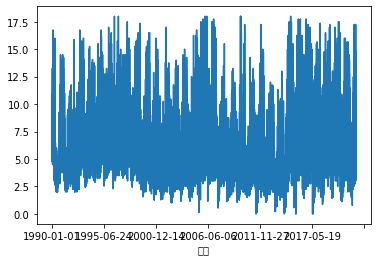

In [62]:
radiosonde['1000hPa_풍속'].plot()

In [65]:
radiosonde.to_csv('../data/preprocessed_고층기후데이터.csv')